In [26]:
%pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [27]:
import wbdata
import warnings 

warnings.filterwarnings('ignore')

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

In [29]:
wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Findex database
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Global P

In [45]:
wbdata.get_indicators(source = 2)

id                          name
--------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------
AG.CON.FERT.PT.ZS           Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS              Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2              Agricultural land (sq. km)
AG.LND.AGRI.ZS              Agricultural land (% of land area)
AG.LND.ARBL.HA              Arable land (hectares)
AG.LND.ARBL.HA.PC           Arable land (hectares per person)
AG.LND.ARBL.ZS              Arable land (% of land area)
AG.LND.CREL.HA              Land under cereal production (hectares)
AG.LND.CROP.ZS              Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2           Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS           Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.EL5M.UR.K2  

In [66]:
indicators = {
    'SP.POP.TOTL': 'Population',
    'AG.LND.CREL.HA': 'Land_Cereal',
    'AG.YLD.CREL.KG': 'Cereal_Yield',
    'NV.AGR.TOTL.ZS': 'Agri_GDP_Share',
    'SL.AGR.EMPL.ZS': 'Agri_Employment',
    'AG.LND.ARBL.ZS': 'Arable_Land_Pct',
    'SP.DYN.TFRT.IN': 'Fertility_Rate',
    'SP.DYN.LE00.IN': 'Life_Expectancy',
    'NY.GDP.PCAP.CD': 'GDP_per_Capita',
    'SE.SEC.ENRR.FE': 'Female_Education',
    'SM.POP.NETM': 'Net_Migration',

}

              

In [74]:
SOM_DF = wbdata.get_dataframe(indicators, country='SOM', parse_dates=True).reset_index()

In [75]:
SOM_DF

,date,Population,Land_Cereal,Cereal_Yield,Agri_GDP_Share,Agri_Employment,Arable_Land_Pct,Fertility_Rate,Life_Expectancy,GDP_per_Capita,Female_Education,Net_Migration
0,2024-01-01,19009151.0,NaN,NaN,NaN,30.285233,NaN,NaN,NaN,629.538899,NaN,26859.0
1,2023-01-01,18358615.0,353642.0,503.5,NaN,30.526100,1.753435,6.132,58.816,596.885985,2.75847,46217.0
2,2022-01-01,17801897.0,353638.0,396.0,NaN,30.883990,1.753435,6.255,53.931,573.141166,NaN,-92434.0
3,2021-01-01,17271431.0,353635.0,314.0,NaN,30.955484,1.753435,6.353,55.703,549.056995,NaN,35506.0
4,2020-01-01,16651191.0,353654.0,503.5,NaN,30.050432,1.753435,6.453,57.095,518.161133,NaN,77259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,1964-01-01,3192796.0,511000.0,463.8,64.513591,NaN,1.444193,7.261,44.393,71.889940,NaN,1518.0
61,1963-01-01,3110361.0,520000.0,467.3,64.032671,NaN,1.436223,7.258,44.194,69.492234,NaN,1449.0
62,1962-01-01,3030091.0,515000.0,485.4,64.947059,NaN,1.428253,7.255,43.972,67.170236,NaN,1496.0
63,1961-01-01,2952054.0,521000.0,489.4,64.163654,NaN,1.420282,7.252,43.667,64.924258,NaN,1336.0


In [76]:
cols_to_fix = [col for col in SOM_DF.columns if col != 'date']

SOM_DF[cols_to_fix] = SOM_DF[cols_to_fix].apply(pd.to_numeric, errors='coerce')

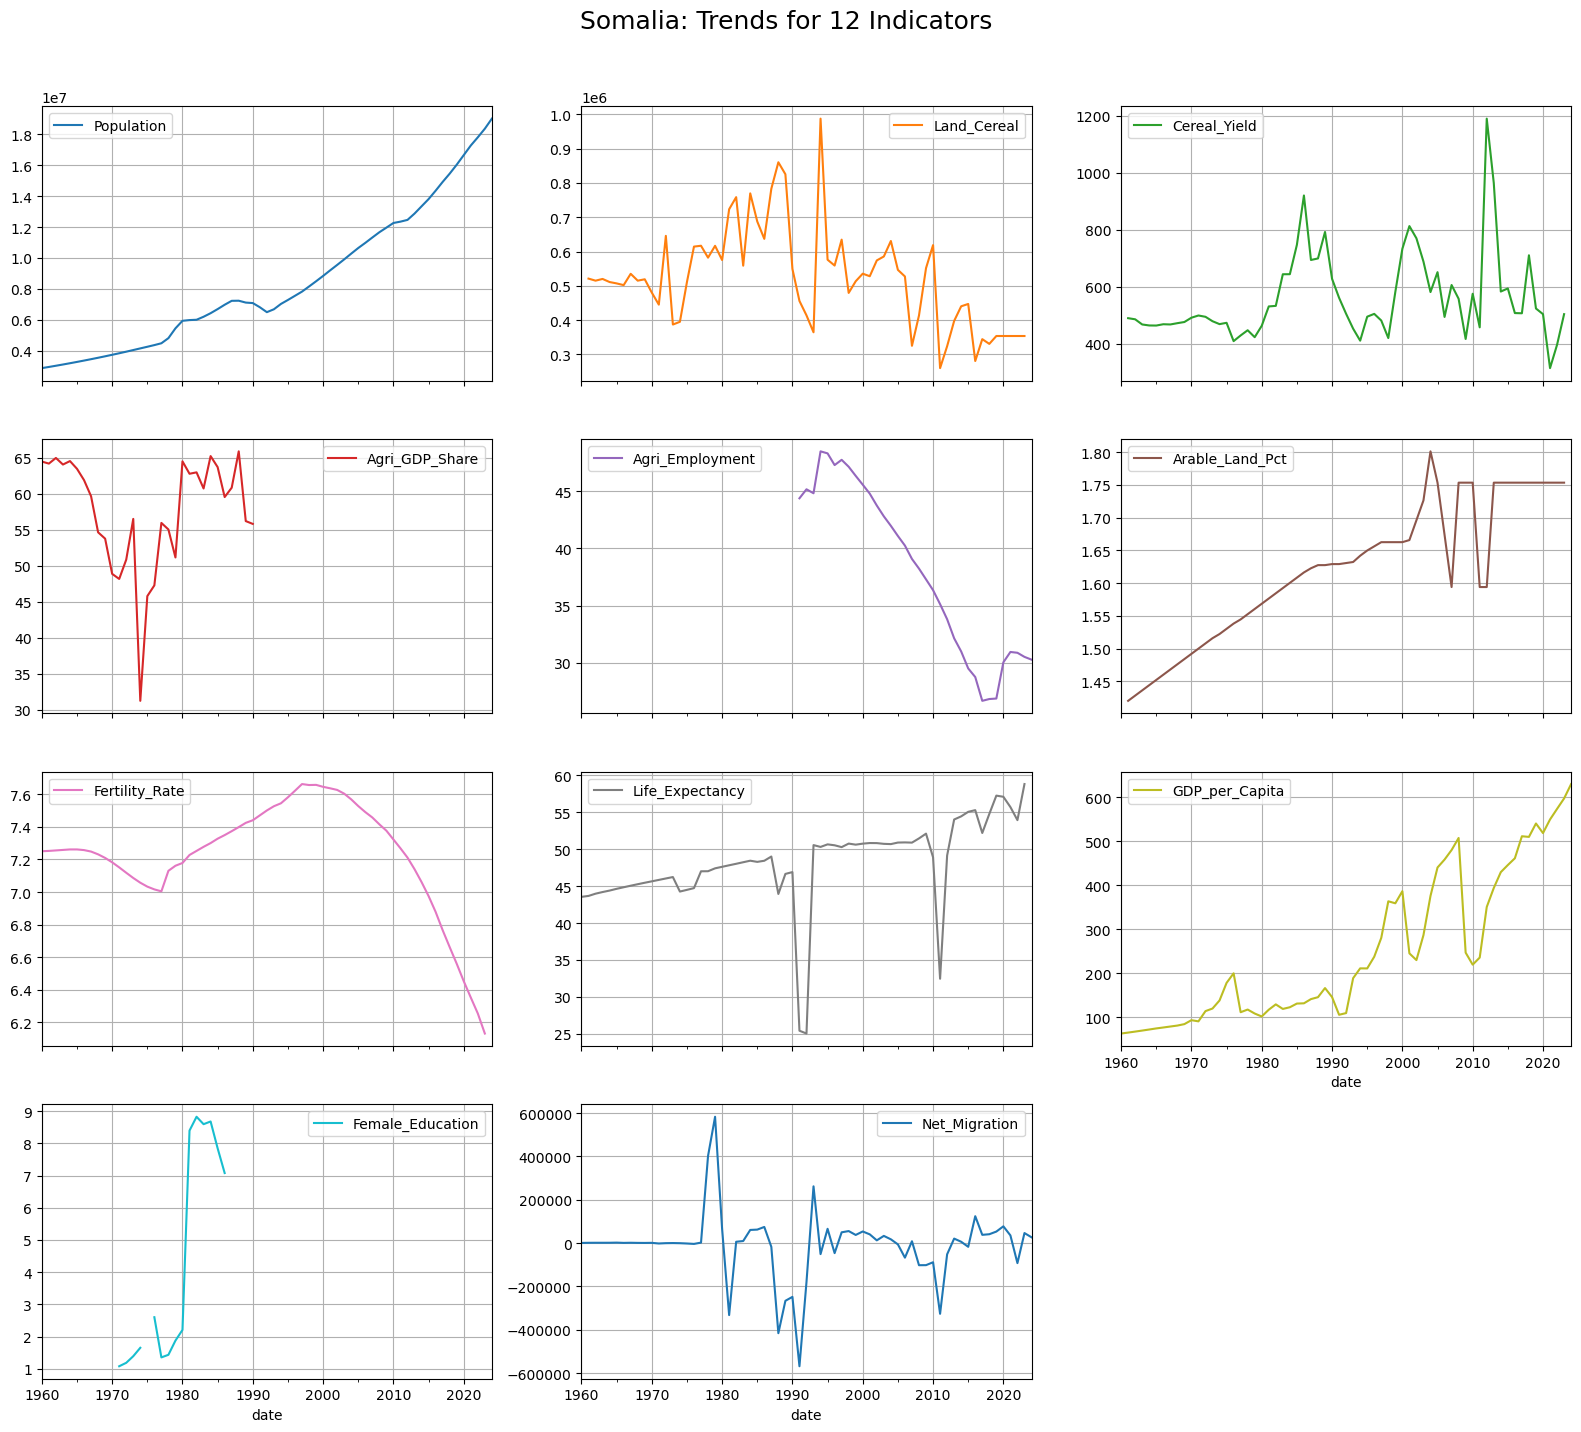

In [77]:
num_indicators = len(SOM_DF.columns) 

SOM_DF.set_index('date').sort_index().plot(
    subplots=True, 
    layout=(4, 3),       
    figsize=(16, 14),    
    sharex=True, 
    grid=True
)

plt.suptitle(f"Somalia: Trends for {num_indicators} Indicators", fontsize=18, y=1.02)

plt.tight_layout() 
plt.show()